# Forecasting for the Exogenous Variables

In order for the ARIMAX model to provide a great forecasting, it depends on the exogenous variable. However the exogenous variables must also be forecasted in order to fill the gap.

___
Initialize the required function for data processing

Load the necessary libraries

In [115]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

load the dataset

In [116]:
df = pd.read_csv('dataset.csv', index_col='Month', parse_dates=True,date_parser=lambda x: pd.to_datetime(x, format='%y-%b'))


In [117]:
# Initialise for future use

production = df['Production']
withdrawals = df['Withdrawals']
globalPrice = df['GlobalPrice']
exchangeRate = df['ExchangeRate']
temperature = df['TempMax']
precipitation = df['Precipitation']

In [118]:
# ADF test for stationarity

def ADF_test(df):
    p = adfuller(df)[1]
    print(f'P-value: {p} < 0.05')
    if p < 0.05:
        print('The time series is stationary')
    else:
        print('The time series is not stationary')

In [119]:
# Optional Differencing

def Differencing(df, lags):
    df_diff = df.diff(lags).dropna()
    df_diff.plot(), ADF_test(df_diff)

In [120]:
# Train test Split

def train_test_split(df, test_size):
    total = len(df)
    train_size = int(total - test_size)

    train = df.iloc[:train_size]
    test = df.iloc[train_size:]

    return train, test

In [121]:
# example of train test split
train, test = train_test_split(production, 24)

### ACF and PACF

The ACF and PACF are essential for find the AR and MA component of the ARIMA.

Criteria:

For AR(p)
- Based on PACF
- The ACF should show a smooth decay approaching zero
- The PACF should show a cut off (rapid drop)

For MA(q)
- Based on ACF
- The PACF should show a smooth decay approaching zero
- The ACF should show a cut off

In [122]:
def ACF_PACF(df, lags):
    plot_acf(df, lags=lags);
    plot_pacf(df, lags=lags);

In [123]:
# Modelling 

def Model(train, test, order):
    model = ARIMA(train, order=order).fit()

    start = len(train)
    end = start + len(test) - 1

    pred= model.predict(start=start, end=end, typ='levels', dynamic=False).rename('Forecast')

    pred.plot(legend=True)
    test.plot(legend=True)

    # Compare the forecast with the test set
    pred.apply(lambda x: f"{x:.2f}")
    for i in range(len(pred)):
        print(f'Actual: {test[i]}, Predicted: {pred[i]}')
    

In [124]:
# Forecasting 

def Forecast(df, order, months):

    final_model = ARIMA(df, order = order).fit()
    forecast = final_model.forecast(steps=months).rename('Forecast')
    # forecast.apply(lambda x: f"{x:.2f}")
    
    return forecast

In [125]:
def Forecasted_plot(actual, forecasted):
    plt.figure(figsize=(12, 6))
    plt.plot(actual, label='Actual', color='blue')
    plt.plot(forecasted, label='Forecasted', color='red')
    plt.title('Forecast vs Actual')
    plt.legend()
    plt.show()

___


# Production


<Axes: xlabel='Month'>

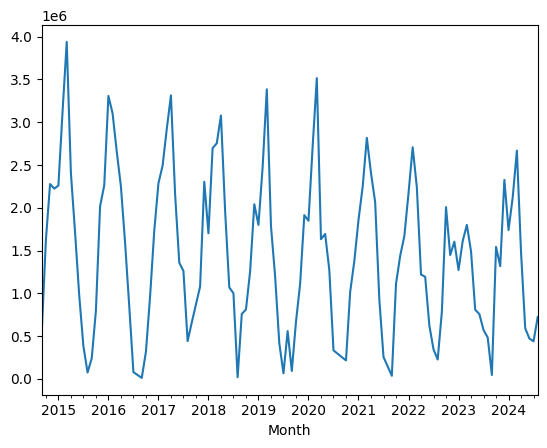

In [126]:
production.plot()

In [127]:
ADF_test(production)

P-value: 0.2760270877045634 < 0.05
The time series is not stationary


P-value: 2.9231354145461644e-15 < 0.05
The time series is stationary


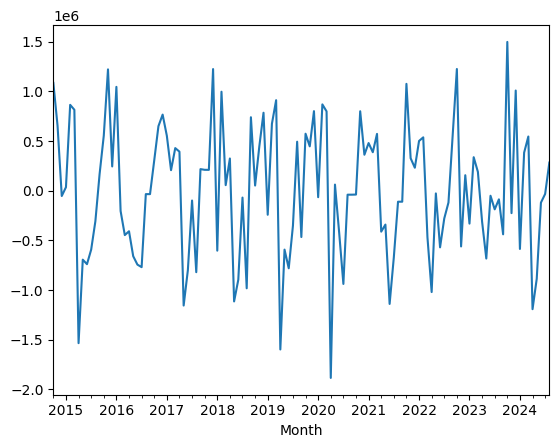

In [128]:
Differencing(production, 1)

In [129]:
prod_train, prod_test = train_test_split(production, 24)

In [130]:
ADF_test(prod_train)

P-value: 3.21005931940272e-13 < 0.05
The time series is stationary


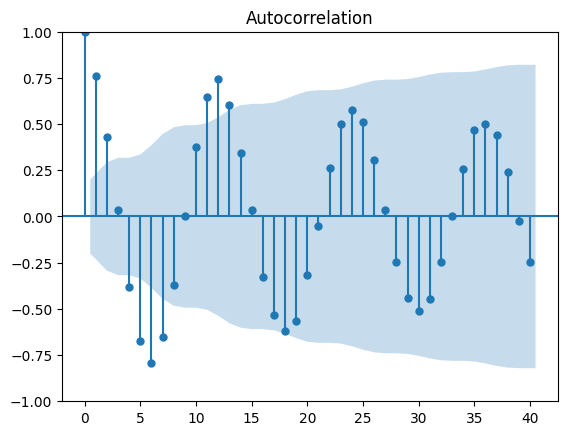

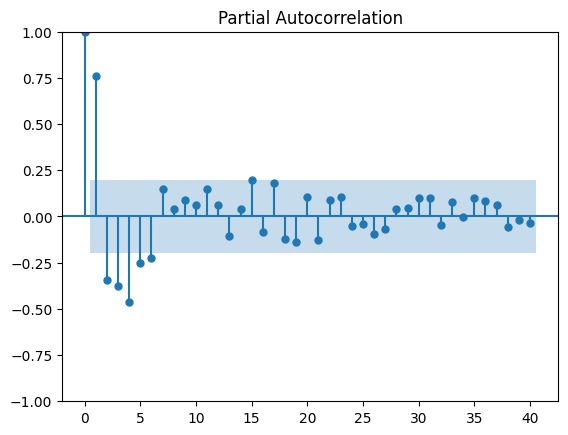

In [131]:
ACF_PACF(prod_train, 40)

Based on the Graph, there is no MA component, only AR. The AR compomponent could be 1 or 2

Actual: 782119.0, Predicted: 748612.8058658831
Actual: 2007522.0, Predicted: 1377400.7016133256
Actual: 1446898.0, Predicted: 1949336.7252131365
Actual: 1603146.0, Predicted: 2337408.444376526
Actual: 1272210.0, Predicted: 2474861.69927363
Actual: 1610065.0, Predicted: 2362855.0692547327
Actual: 1800101.0, Predicted: 2061106.5248608496
Actual: 1489215.0, Predicted: 1666007.848982208
Actual: 806884.0, Predicted: 1283033.635236444
Actual: 756657.5, Predicted: 1000701.7154751306
Actual: 569482.0, Predicted: 872006.3965327741
Actual: 482943.5, Predicted: 906695.2914731051
Actual: 44419.0, Predicted: 1074757.6101847421
Actual: 1542323.0, Predicted: 1318803.7935103548
Actual: 1316907.0, Predicted: 1571233.8818634597
Actual: 2325542.0, Predicted: 1771513.467963206
Actual: 1739690.0, Predicted: 1879476.6814748093
Actual: 2122968.0, Predicted: 1882056.367228825
Actual: 2668661.0, Predicted: 1792736.2581480863
Actual: 1476667.0, Predicted: 1644827.2295888602
Actual: 590428.0, Predicted: 1480975.

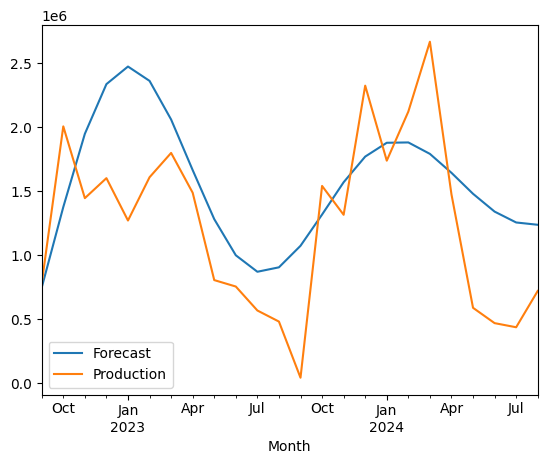

In [132]:
Model(prod_train, prod_test, (2,0,1))

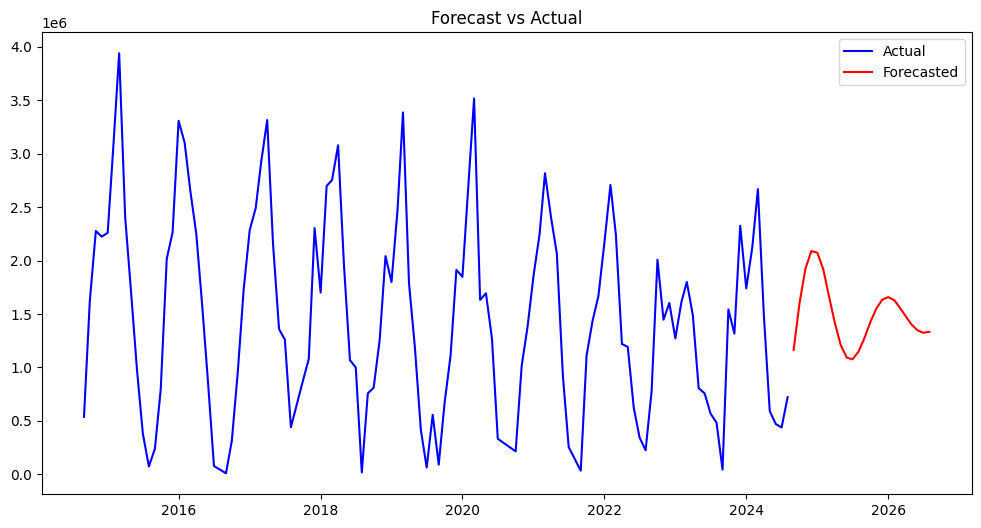

2024-09-01    1164961.16
2024-10-01    1600078.18
2024-11-01    1927485.23
2024-12-01    2088678.99
2025-01-01    2073491.45
2025-02-01    1914499.39
2025-03-01    1672401.10
2025-04-01    1417252.63
2025-05-01    1210614.35
2025-06-01    1092615.37
2025-07-01    1076137.89
2025-08-01    1148303.70
2025-09-01    1277714.17
2025-10-01    1424810.80
2025-11-01    1552429.95
2025-12-01    1634062.17
2026-01-01    1658270.79
2026-02-01    1628873.32
2026-03-01    1561540.99
2026-04-01    1478198.05
2026-05-01    1400887.10
2026-06-01    1346616.99
2026-07-01    1324231.03
2026-08-01    1333692.27
Freq: MS, Name: Forecast, dtype: object

In [133]:
forecast = Forecast(production, (2,0,1), 24)

Forecasted_plot(production, forecast)
forecast.apply(lambda x: f"{x:.2f}")

# Withdrawals

<Axes: xlabel='Month'>

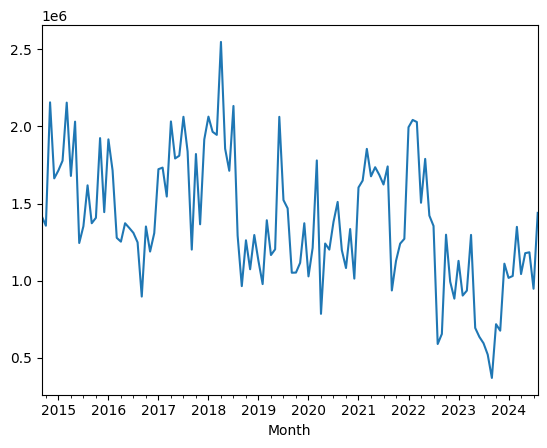

In [134]:
withdrawals.plot()

In [135]:
ADF_test(withdrawals)

P-value: 0.2252467834044763 < 0.05
The time series is not stationary


P-value: 0.019063452229377265 < 0.05
The time series is stationary


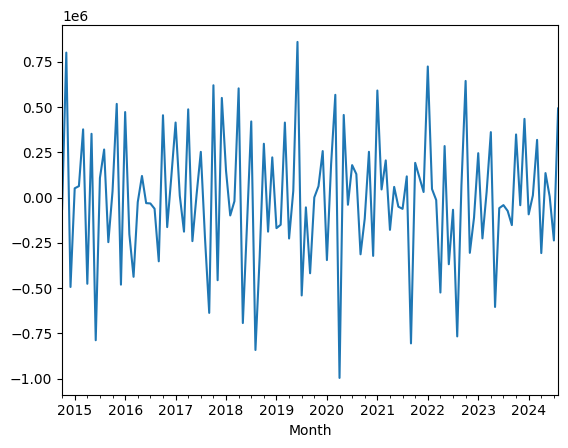

In [136]:
Differencing(withdrawals, 1)

In [137]:
with_train, with_test = train_test_split(withdrawals, 24)

In [138]:
ADF_test(with_train)

P-value: 0.2105189930767179 < 0.05
The time series is not stationary


P-value: 0.03299407455420619 < 0.05
The time series is stationary


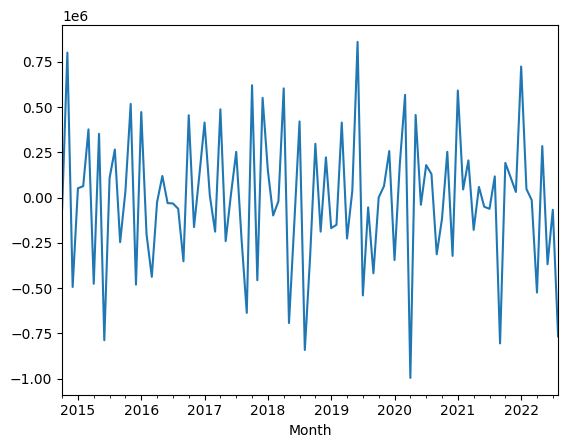

In [139]:
Differencing(with_train, 1)

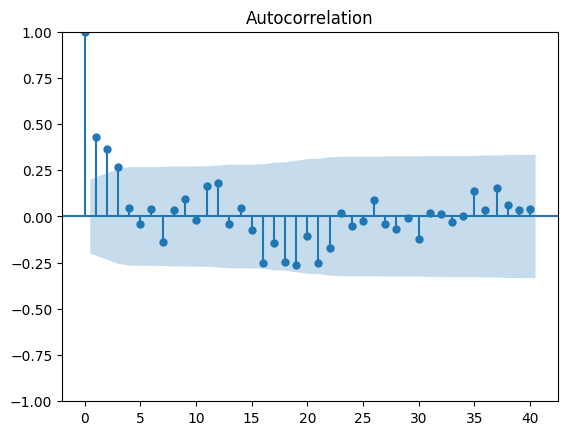

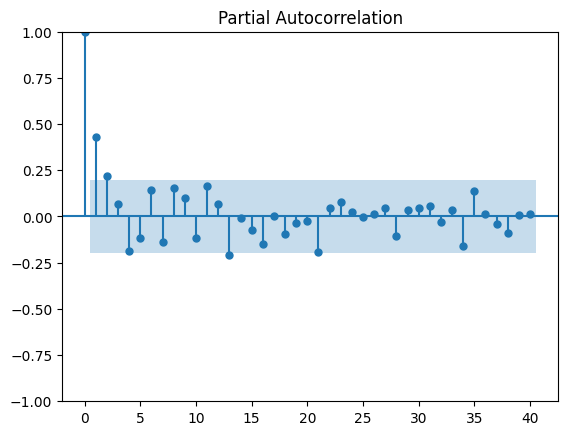

In [140]:
ACF_PACF(with_train, 40)

Actual: 653106, Predicted: 845155.4929882345
Actual: 1297513, Predicted: 831952.5258274296
Actual: 992443, Predicted: 1170768.4039807862
Actual: 882287, Predicted: 1190638.5017922802
Actual: 1127713, Predicted: 1345276.6186616903
Actual: 902429, Predicted: 1298779.6328578235
Actual: 934551, Predicted: 1503030.0785667272
Actual: 1296228, Predicted: 1383133.9322194527
Actual: 692246, Predicted: 1333526.3252195055
Actual: 634228, Predicted: 1202694.5005038748
Actual: 592765, Predicted: 1166985.1512307622
Actual: 519388, Predicted: 1122292.4787690702
Actual: 367692, Predicted: 1176793.6047419335
Actual: 716481, Predicted: 1142144.5130822177
Actual: 674464, Predicted: 1197207.8430733038
Actual: 1109465, Predicted: 1230774.6555563812
Actual: 1017046, Predicted: 1269688.8584676944
Actual: 1029578, Predicted: 1278047.9694292708
Actual: 1348478, Predicted: 1284542.5796488312
Actual: 1042072, Predicted: 1248373.2663643928
Actual: 1177536, Predicted: 1246565.245478973
Actual: 1183388, Predicted: 

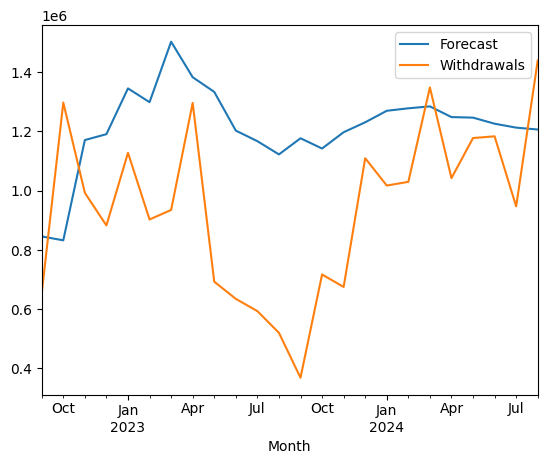

In [141]:
Model(with_train, with_test, (8,1,0))

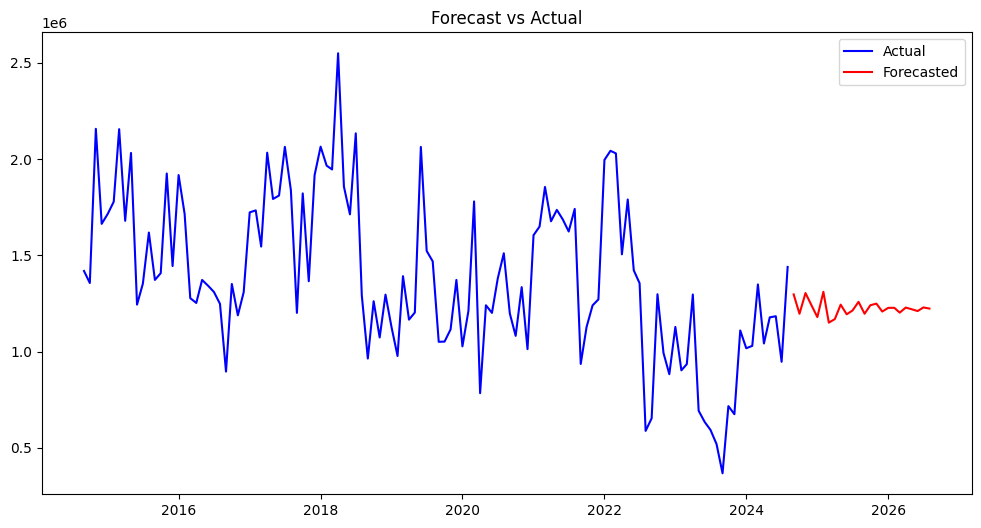

2024-09-01    1296815.40
2024-10-01    1196107.74
2024-11-01    1303755.51
2024-12-01    1241795.65
2025-01-01    1178765.44
2025-02-01    1310144.43
2025-03-01    1150084.12
2025-04-01    1168576.21
2025-05-01    1243513.79
2025-06-01    1193429.84
2025-07-01    1213046.12
2025-08-01    1258218.02
2025-09-01    1196276.47
2025-10-01    1240567.49
2025-11-01    1248782.37
2025-12-01    1207710.64
2026-01-01    1226925.64
2026-02-01    1227002.88
2026-03-01    1202155.42
2026-04-01    1228384.11
2026-05-01    1219841.85
2026-06-01    1210215.79
2026-07-01    1229006.60
2026-08-01    1223179.15
Freq: MS, Name: Forecast, dtype: object

In [142]:
forecast = Forecast(withdrawals, (8,1,0), 24)
Forecasted_plot(withdrawals, forecast)
forecast.apply(lambda x: f"{x:.2f}")

# Global Price

<Axes: xlabel='Month'>

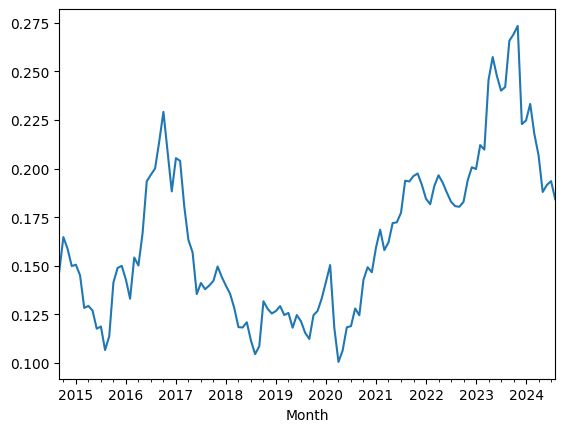

In [143]:
globalPrice.plot()

In [144]:
ADF_test(globalPrice)

P-value: 0.39893074883281937 < 0.05
The time series is not stationary


P-value: 9.25343456590585e-13 < 0.05
The time series is stationary


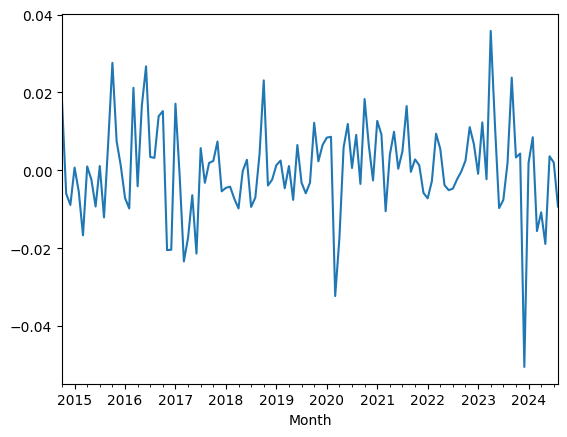

In [145]:
Differencing(globalPrice, 1)

In [146]:
gPrice_train, gPrice_test = train_test_split(globalPrice, 24)
ADF_test(gPrice_train)

P-value: 0.26869309208945824 < 0.05
The time series is not stationary


P-value: 7.963750641682842e-05 < 0.05
The time series is stationary


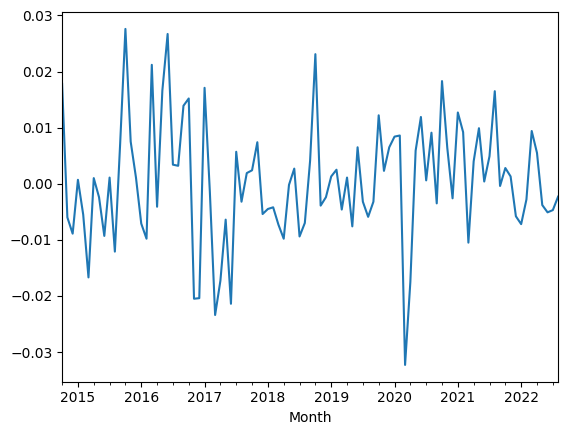

In [147]:
Differencing(gPrice_train, 1)

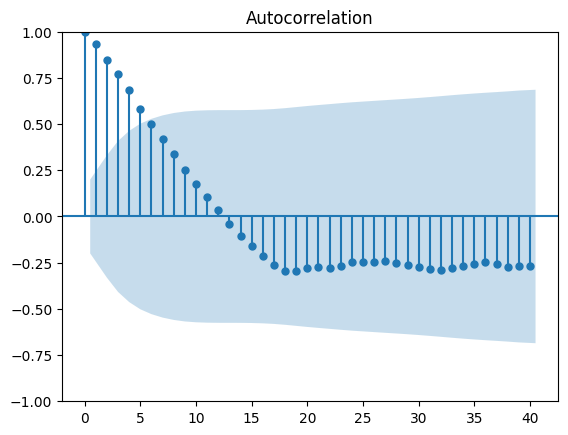

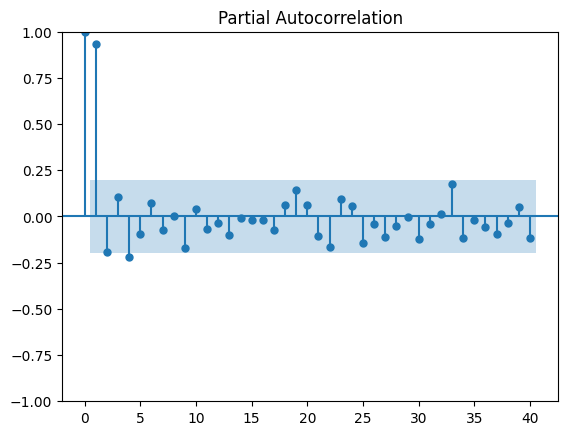

In [148]:
ACF_PACF(gPrice_train, 40)

Actual: 0.1804, Predicted: 0.17937123973886143
Actual: 0.1829, Predicted: 0.17895810438403076
Actual: 0.194, Predicted: 0.1791286464858515
Actual: 0.2007, Predicted: 0.17949489456898257
Actual: 0.1998, Predicted: 0.17969692972531465
Actual: 0.2121, Predicted: 0.17984348443013387
Actual: 0.2098, Predicted: 0.179956386503225
Actual: 0.2456, Predicted: 0.17998540180641287
Actual: 0.2574, Predicted: 0.17995965502766967
Actual: 0.2477, Predicted: 0.17994860120752468
Actual: 0.2401, Predicted: 0.17994329390459562
Actual: 0.242, Predicted: 0.17992785815626422
Actual: 0.2658, Predicted: 0.17991858538392777
Actual: 0.2691, Predicted: 0.17992102001154336
Actual: 0.2734, Predicted: 0.17992201631321877
Actual: 0.2229, Predicted: 0.1799202027286545
Actual: 0.2248, Predicted: 0.179921361680213
Actual: 0.2333, Predicted: 0.17992339014512532
Actual: 0.2177, Predicted: 0.17992312871851746
Actual: 0.2069, Predicted: 0.1799226497406696
Actual: 0.188, Predicted: 0.17992318096357854
Actual: 0.1916, Predict

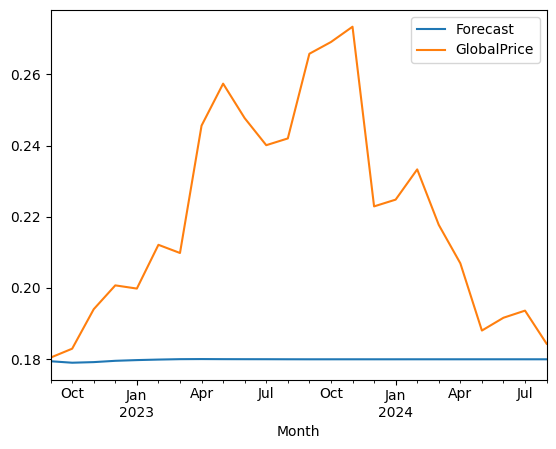

In [160]:
Model(gPrice_train, gPrice_test, (5,1,0))

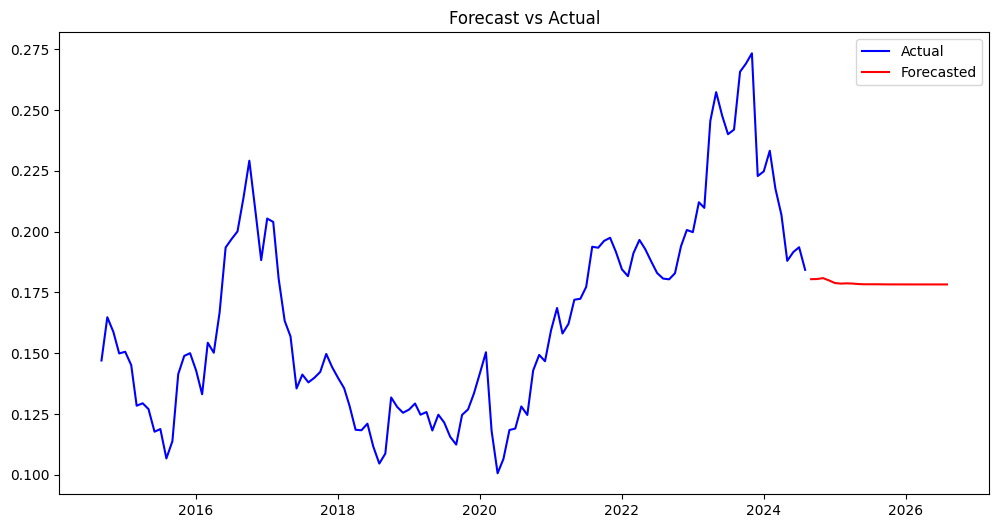

2024-09-01    0.180462
2024-10-01    0.180516
2024-11-01    0.180893
2024-12-01    0.179982
2025-01-01    0.178878
2025-02-01    0.178636
2025-03-01    0.178739
2025-04-01    0.178660
2025-05-01    0.178463
2025-06-01    0.178362
2025-07-01    0.178364
2025-08-01    0.178366
2025-09-01    0.178337
2025-10-01    0.178311
2025-11-01    0.178306
2025-12-01    0.178307
2026-01-01    0.178304
2026-02-01    0.178299
2026-03-01    0.178296
2026-04-01    0.178296
2026-05-01    0.178296
2026-06-01    0.178295
2026-07-01    0.178295
2026-08-01    0.178295
Freq: MS, Name: Forecast, dtype: float64

In [162]:
forecast = Forecast(globalPrice, (5,1,0), 24)
Forecasted_plot(globalPrice, forecast)
forecast

# Exchange Rate

<Axes: xlabel='Month'>

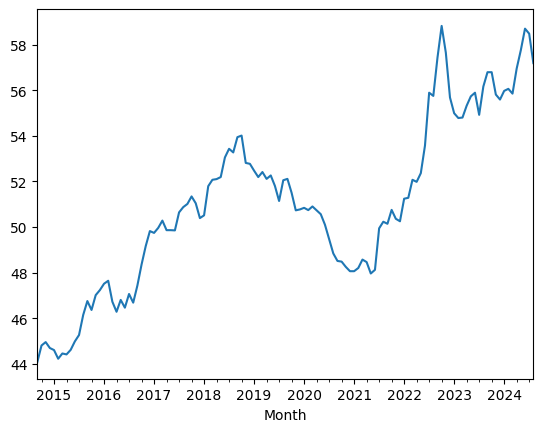

In [153]:
exchangeRate.plot()

In [155]:
ADF_test(exchangeRate)

P-value: 0.6363739272671771 < 0.05
The time series is not stationary


P-value: 4.629212138886278e-13 < 0.05
The time series is stationary


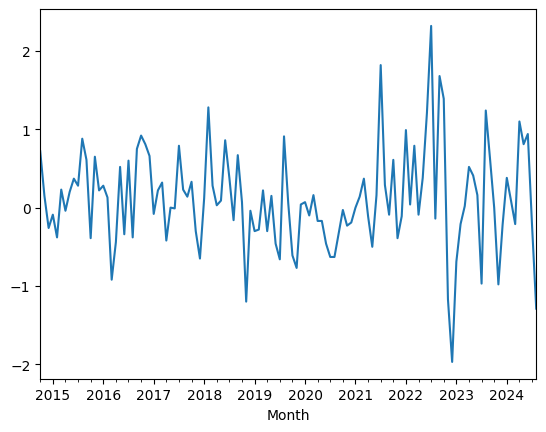

In [156]:
Differencing(exchangeRate, 1)

In [157]:
eRate_train, eRate_test = train_test_split(exchangeRate, 24)
ADF_test(eRate_train)

P-value: 0.8072736145790143 < 0.05
The time series is not stationary


P-value: 4.3559251889283095e-12 < 0.05
The time series is stationary


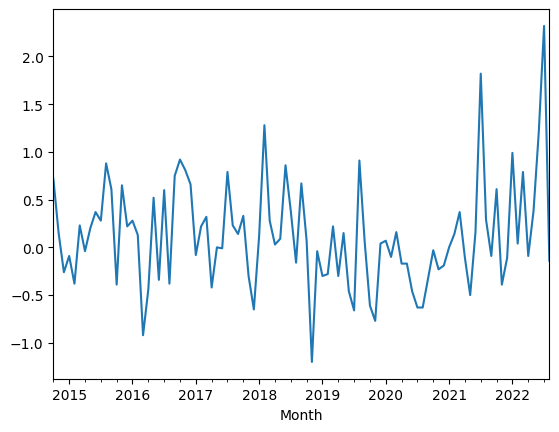

In [158]:
Differencing(eRate_train, 1)

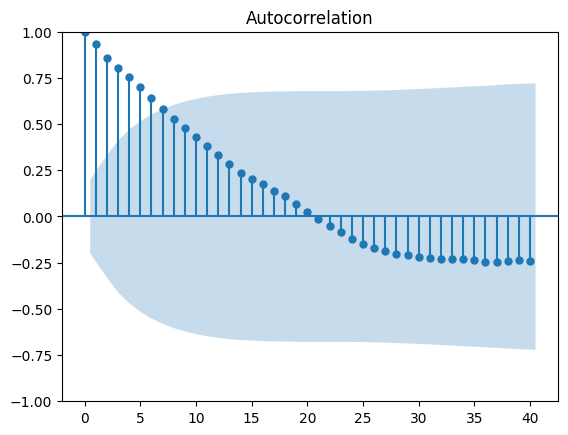

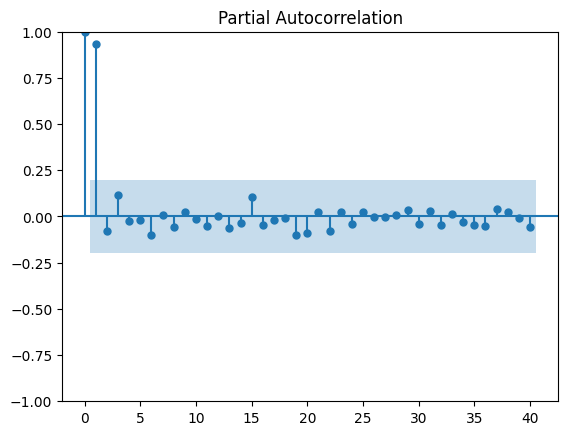

In [159]:
ACF_PACF(eRate_train,40)

Actual: 57.43, Predicted: 56.20492982326967
Actual: 58.82, Predicted: 56.705964722685195
Actual: 57.65, Predicted: 56.42468948550892
Actual: 55.68, Predicted: 56.82599548163016
Actual: 54.99, Predicted: 57.24893300399182
Actual: 54.78, Predicted: 56.54065572934991
Actual: 54.8, Predicted: 56.691149739622304
Actual: 55.32, Predicted: 56.453163988846974
Actual: 55.73, Predicted: 56.550633591045674
Actual: 55.89, Predicted: 56.71111462430503
Actual: 54.92, Predicted: 56.59459220530189
Actual: 56.16, Predicted: 56.49925017869362
Actual: 56.79, Predicted: 56.614087571156965
Actual: 56.79, Predicted: 56.65916930420788
Actual: 55.81, Predicted: 56.55838260909048
Actual: 55.59, Predicted: 56.54884908357131
Actual: 55.97, Predicted: 56.62969191472864
Actual: 56.06, Predicted: 56.61661906961664
Actual: 55.85, Predicted: 56.557025447672
Actual: 56.95, Predicted: 56.58230320963626
Actual: 57.76, Predicted: 56.62226834123511
Actual: 58.7, Predicted: 56.59246866607725
Actual: 58.48, Predicted: 56.56

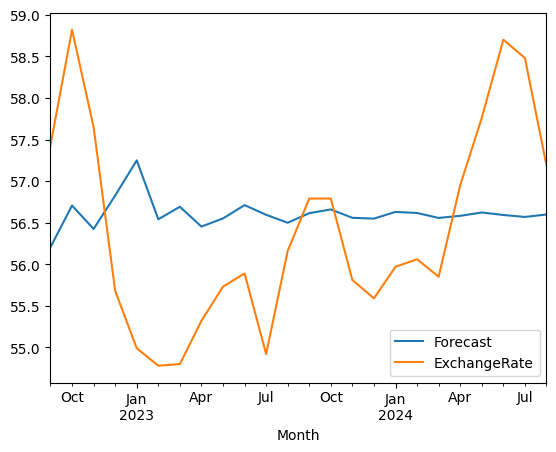

In [180]:
Model(eRate_train, eRate_test, (2,1,9))

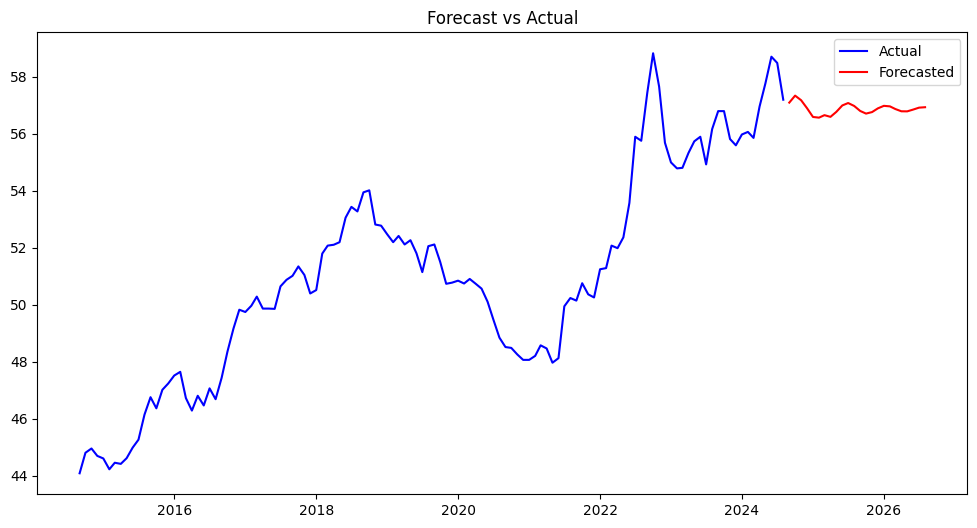

2024-09-01    57.088720
2024-10-01    57.333749
2024-11-01    57.171908
2024-12-01    56.896098
2025-01-01    56.585040
2025-02-01    56.560637
2025-03-01    56.648212
2025-04-01    56.588822
2025-05-01    56.762742
2025-06-01    56.989200
2025-07-01    57.074148
2025-08-01    56.971318
2025-09-01    56.795790
2025-10-01    56.703231
2025-11-01    56.755770
2025-12-01    56.886524
2026-01-01    56.975574
2026-02-01    56.956875
2026-03-01    56.863462
2026-04-01    56.784105
2026-05-01    56.781462
2026-06-01    56.845076
2026-07-01    56.911967
2026-08-01    56.926830
Freq: MS, Name: Forecast, dtype: float64

In [182]:
forecast = Forecast(exchangeRate, (2,1,9), 24)
Forecasted_plot(exchangeRate, forecast)
forecast

# Temperature


<Axes: xlabel='Month'>

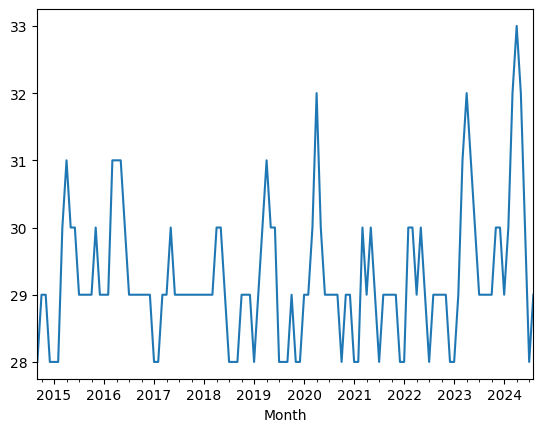

In [183]:
temperature.plot()

In [185]:
ADF_test(temperature)

P-value: 0.8994434774757843 < 0.05
The time series is not stationary


P-value: 0.01324253375192389 < 0.05
The time series is stationary


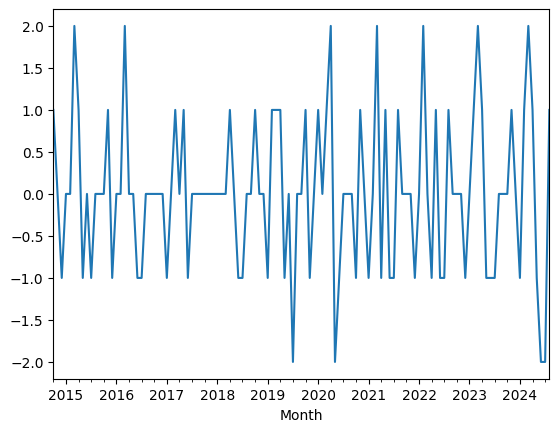

In [186]:
Differencing(temperature, 1)

In [188]:
temp_train, temp_test = train_test_split(temperature, 24)
ADF_test(temp_train)

P-value: 0.23032267138123358 < 0.05
The time series is not stationary


P-value: 6.295159977870521e-10 < 0.05
The time series is stationary


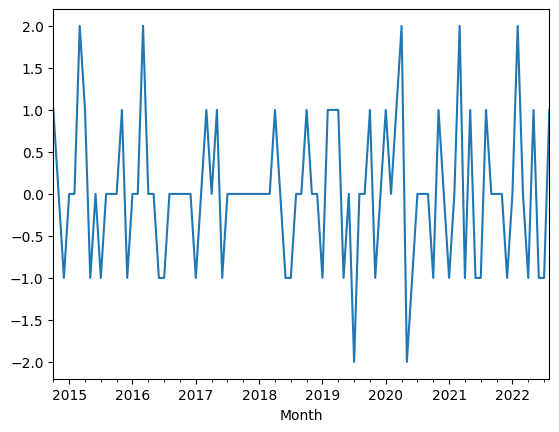

In [189]:
Differencing(temp_train, 1)

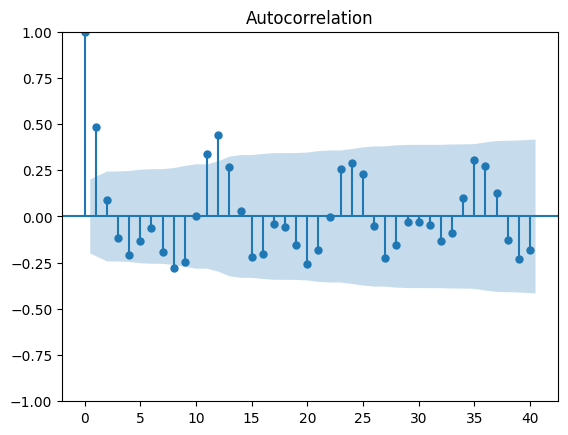

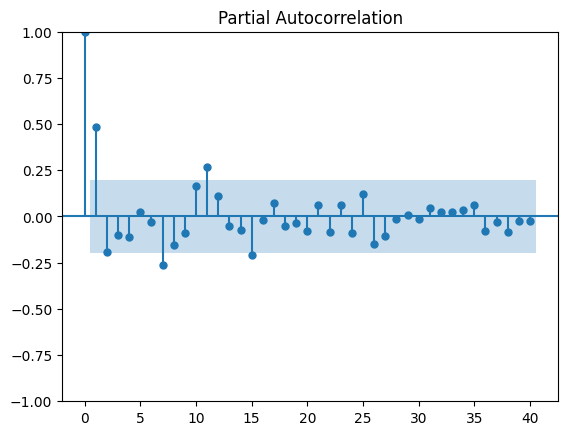

In [190]:
ACF_PACF(temp_train, 40)

Actual: 29, Predicted: 29.212875257207866
Actual: 29, Predicted: 29.25140533810516
Actual: 29, Predicted: 29.2097041112285
Actual: 28, Predicted: 29.09515268115928
Actual: 28, Predicted: 29.09370423498794
Actual: 29, Predicted: 29.051119206474528
Actual: 31, Predicted: 29.096761354267837
Actual: 32, Predicted: 29.072353987467125
Actual: 31, Predicted: 29.11083066247921
Actual: 30, Predicted: 29.079449160957044
Actual: 29, Predicted: 29.108987003115214
Actual: 29, Predicted: 29.077975047206717
Actual: 29, Predicted: 29.10583479375263
Actual: 29, Predicted: 29.07830314794937
Actual: 30, Predicted: 29.104880109242725
Actual: 30, Predicted: 29.079660075353416
Actual: 29, Predicted: 29.10417950430551
Actual: 30, Predicted: 29.0806886374758
Actual: 32, Predicted: 29.103271952904198
Actual: 33, Predicted: 29.081502469409127
Actual: 32, Predicted: 29.102409105402455
Actual: 30, Predicted: 29.08228597119293
Actual: 28, Predicted: 29.101644954536283
Actual: 29, Predicted: 29.0830290106472


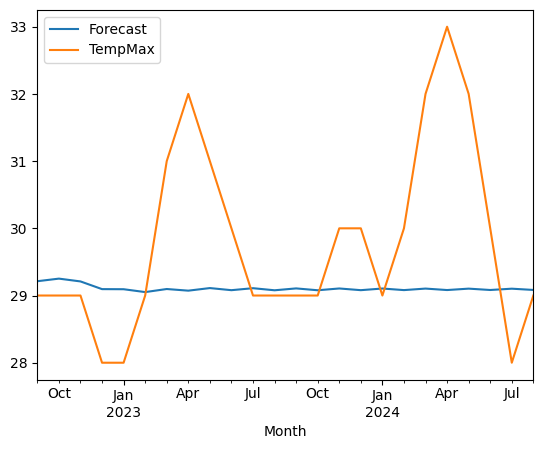

In [201]:
Model(temp_train,temp_test, (4,1,2))

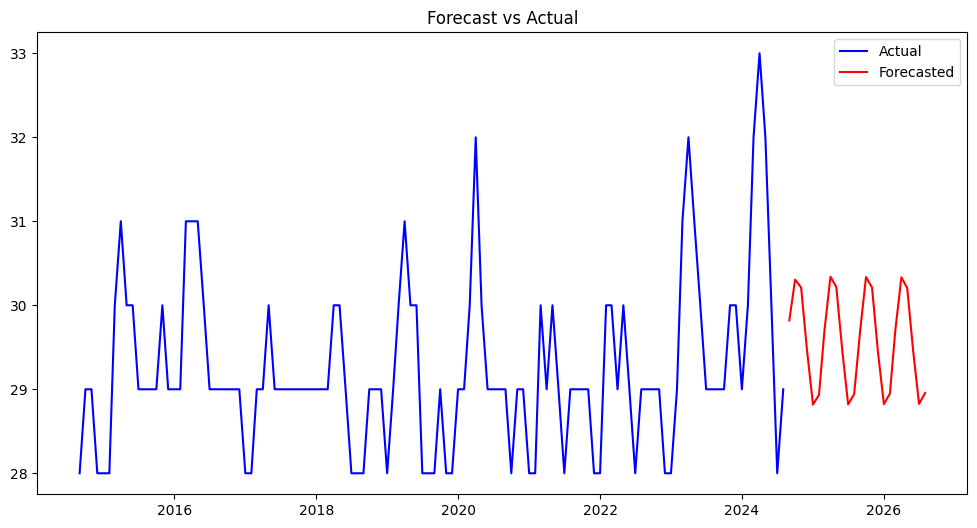

2024-09-01    29.819657
2024-10-01    30.304910
2024-11-01    30.211225
2024-12-01    29.470845
2025-01-01    28.817239
2025-02-01    28.934015
2025-03-01    29.698294
2025-04-01    30.339737
2025-05-01    30.218321
2025-06-01    29.457500
2025-07-01    28.819559
2025-08-01    28.942629
2025-09-01    29.702071
2025-10-01    30.336613
2025-11-01    30.211525
2025-12-01    29.453528
2026-01-01    28.822427
2026-02-01    28.949497
2026-03-01    29.706041
2026-04-01    30.333714
2026-05-01    30.204676
2026-06-01    29.449591
2026-07-01    28.825335
2026-08-01    28.956327
Freq: MS, Name: Forecast, dtype: float64

In [203]:
forecast = Forecast(temperature, (4,1,2), 24)
Forecasted_plot(temperature, forecast)
forecast

# Precipitation

<Axes: xlabel='Month'>

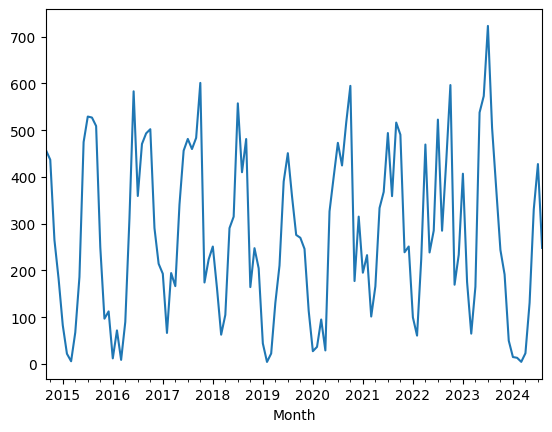

In [204]:
precipitation.plot()

In [205]:
ADF_test(precipitation)

P-value: 0.37821243823258927 < 0.05
The time series is not stationary


P-value: 5.531744325847403e-11 < 0.05
The time series is stationary


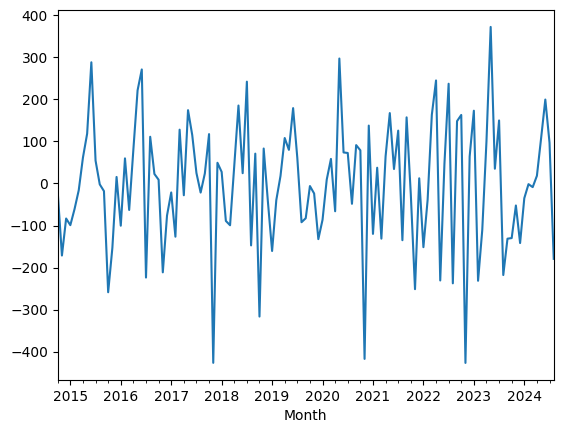

In [206]:
Differencing(precipitation, 1)

In [207]:
perc_train, perc_test = train_test_split(precipitation, 24)
ADF_test(perc_train)

P-value: 0.4801755097758558 < 0.05
The time series is not stationary


P-value: 0.0001667638667513655 < 0.05
The time series is stationary


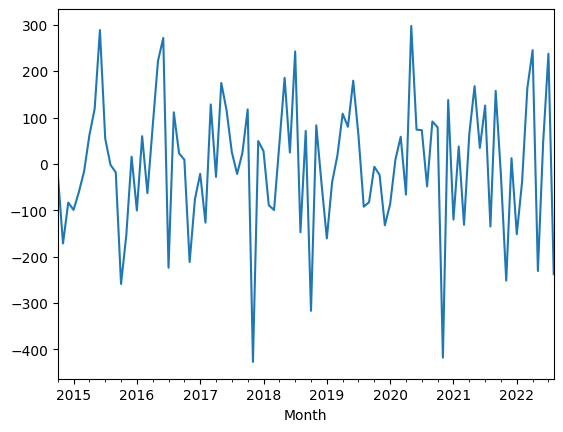

In [208]:
Differencing(perc_train, 1)

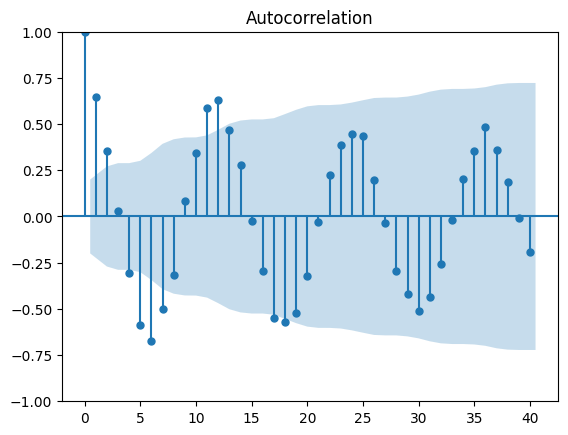

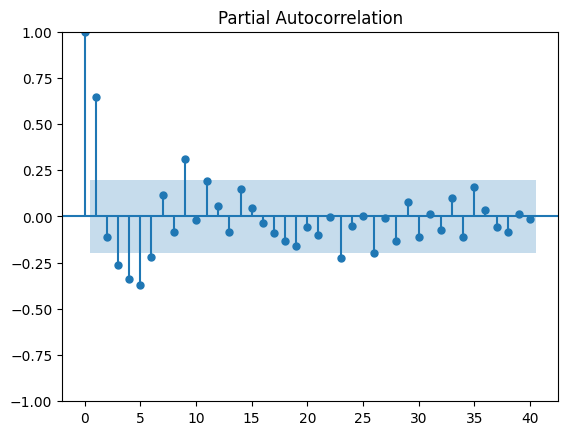

In [209]:
ACF_PACF(perc_train, 40)

Actual: 433.4, Predicted: 270.63700815948675
Actual: 596.5, Predicted: 337.73303000502506
Actual: 169.5, Predicted: 281.9294637701475
Actual: 233.7, Predicted: 239.38854222847155
Actual: 406.91, Predicted: 318.21507977547935
Actual: 175.4, Predicted: 303.23135437227876
Actual: 64.9, Predicted: 291.42319360227333
Actual: 165.2, Predicted: 316.84332980048134
Actual: 537.8, Predicted: 318.70896393212485
Actual: 572.95, Predicted: 296.52266800326754
Actual: 722.95, Predicted: 305.87195877817254
Actual: 505.1, Predicted: 305.098479049838
Actual: 373.75, Predicted: 296.58622292545016
Actual: 243.86, Predicted: 299.3357531681529
Actual: 191.51, Predicted: 304.49292054765846
Actual: 49.8, Predicted: 300.882437456368
Actual: 14.83, Predicted: 302.6880641142788
Actual: 13.23, Predicted: 304.9303170057826
Actual: 4.56, Predicted: 303.30459990896446
Actual: 22.9, Predicted: 302.4358276407166
Actual: 130.78, Predicted: 303.4934175496852
Actual: 330.53, Predicted: 302.49647196577797
Actual: 427.55, 

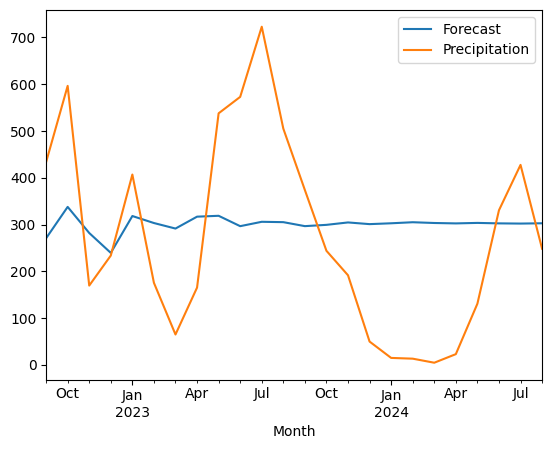

In [211]:
Model(perc_train, perc_test, (5,1,0))

In [ ]:
forecast = Forecast(precipitation, (5,1,0), 24)
Forecasted_plot(precipitation, forecast)
forecast